In [25]:
library(corrplot)

In [2]:
C1_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_logcounts_model_factors.csv"
C2_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/20PCs.csv"
C3_file = "/hps/nobackup/stegle/users/mjbonder/ldvae_emb.txt"

In [3]:
C4_file = "/hps/nobackup/stegle/users/mjbonder/Anna/zinbwave_10.tsv"
C5_file = "/hps/nobackup/stegle/users/mjbonder/Anna/zinbwave_20.tsv"

In [4]:
df_m = read.csv(C1_file, row.names=1)
head(df_m)
dim(df_m)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
21843_1#10,-0.59770402,1.067436,0.05649610,1.3476606,0.64074287,0.3378262,-0.4664193,0.01520844,0.29224277,-0.63273743,-0.5833180,0.4731209,0.4548455,-0.9910469,0.9065298,-0.7866174,0.4459964,-1.8101753,-1.0397955,0.26804527
21843_1#100,0.23328472,2.137884,0.64681148,1.1294599,-0.35277329,-0.0918056,0.9241371,-0.37349156,1.78959325,-0.65923266,0.4622862,-0.1388127,-2.2209369,1.5540730,-1.5173632,-0.3502506,-0.1655910,1.1998157,0.7298591,0.04844414
21843_1#101,-0.05471216,1.786031,-0.09962504,0.3641184,0.05712454,0.2150318,0.2427277,0.07594282,0.87996128,0.68063540,0.3729296,0.2686199,-2.0241302,1.1504519,-0.0549011,-0.4594222,0.4214969,1.1728560,0.7291076,-0.12423939
21843_1#102,-0.73092365,1.132253,0.19564531,0.5882636,1.54819258,0.2512881,-0.3997540,-0.21080050,0.11514749,0.06005745,-0.5846824,-0.4218787,-0.1277769,0.1578197,0.7352463,-1.8183806,-0.1484347,-0.1680945,-0.7703799,1.12432446
21843_1#103,-0.25739878,1.515610,-0.15481623,0.1995322,0.71918179,-0.2960872,-0.4269522,-0.22993931,0.09129241,-0.43056633,-0.4738482,-1.2434719,-0.8528608,-0.0642720,0.3210254,-0.6663932,0.4556240,-0.4105159,-0.6009521,0.30459507
21843_1#105,-0.08814416,1.718287,-0.41369690,0.1634950,-0.15204991,1.0318233,-0.8753088,-0.10746699,0.86141761,-0.48619578,0.3556653,-0.4948912,-0.5447851,0.4098909,-0.2838884,-0.7296647,4.3277732,-0.5339273,0.6719946,0.22840661


[1] 34256    20

In [5]:
df_p = read.csv(C2_file, row.names=1)
head(df_p)
dim(df_p)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
21843_1#10,-12.241231,-12.61522,0.5472086,-11.411204,-7.052088,-2.7536016,-2.8194202,-0.9975142,-2.1342671,-4.434583,3.72461124,2.1542354,-1.9386681,4.9713391,3.666697,-3.69883001,-0.1688695,-4.136780,-3.3134311,-3.032797
21843_1#100,4.509125,-27.06629,7.5564469,-9.366868,-1.471991,-1.2335923,5.4833136,0.8278033,-9.5628148,-1.871798,-0.09199549,-0.8401753,9.9655093,-5.2201286,-1.133895,-1.54243458,-2.2192119,8.085067,5.2650939,-1.568351
21843_1#101,-1.273414,-23.32348,-0.5019034,-3.819575,-1.463243,-1.2923332,0.9258245,-0.6469562,-2.1771446,3.929749,-0.67816565,0.1848936,9.7064564,-5.1364197,1.524443,-0.09948591,0.3435388,6.674060,-1.6569607,3.955077
21843_1#102,-14.962566,-12.96637,1.9674060,-5.446326,-13.316007,-4.0047302,-3.8249876,0.8394911,-0.2184138,1.846062,3.93372962,-1.1736176,0.2684598,0.9425962,2.465615,-6.33553191,-0.0811441,-1.212628,-1.3442962,-2.985996
21843_1#103,-6.341665,-19.01047,-2.8249750,-2.462769,-7.521426,0.7378023,-3.3591702,1.7851181,0.3649170,-2.724446,3.17562693,-5.3978315,5.2029211,2.9455973,1.326522,-2.31916105,-2.1201624,1.491804,-2.5263660,-3.251526
21843_1#105,-2.898238,-20.81476,-2.5975812,-3.445455,-2.409836,-9.1309559,-1.9935207,1.9301146,-3.5125998,-7.291899,-0.84998638,-1.6469148,2.5115226,-0.1373186,-2.950424,-4.82721753,-0.9780500,1.886941,0.8180515,-2.470703


[1] 34256    20

In [ ]:
######## MOFA vs PCA

In [6]:
df = cbind(df_m, df_p)

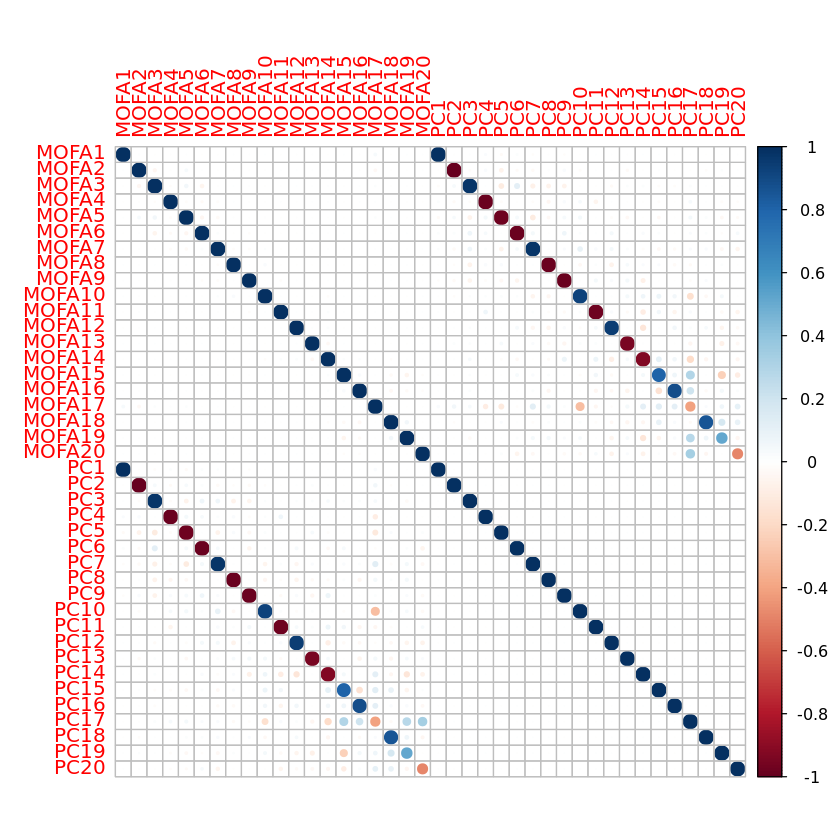

In [7]:
corrplot(cor(df))

In [ ]:
######## LDVAE

In [8]:
df_l = read.csv(C3_file, row.names=1, sep="\t")
head(df_l)
dim(df_l)

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9
21843_1#10,0.15835926,0.57548640,-1.0920529,0.005669974,0.89205330,-1.1053822,0.8257549,0.3321673,0.38922524,-0.3426193
21843_1#100,-0.99581910,-0.03129572,0.4549317,0.382778760,0.04132521,-1.7591518,0.7718497,0.7864397,0.14771053,0.5167057
21843_1#101,0.15983821,-0.06117378,-0.2807216,0.170649980,-0.03552028,-1.1912143,0.9442740,0.8091362,-0.12600906,0.5608869
21843_1#102,0.47031307,0.52152740,-1.1739447,0.033984930,0.67583615,-0.7340453,1.2322657,0.3887742,0.36119926,-0.2339321
21843_1#103,0.02762085,0.09862162,-0.5686437,0.061363930,0.36851442,-0.9596231,1.0796988,0.5479261,-0.01044223,0.3822054
21843_1#105,-0.39938742,0.60811530,-0.1765694,0.119307645,-0.36821938,-1.4501845,0.9918731,0.5246490,0.32371074,0.3435179


[1] 34256    10

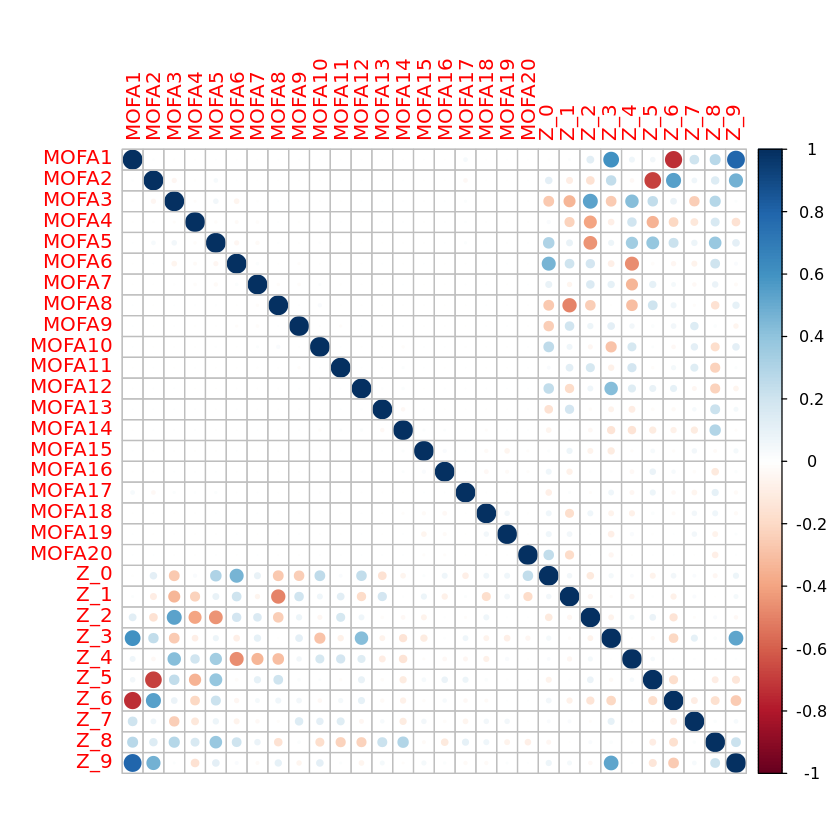

In [16]:
df1 = cbind(df_m, df_l)
corrplot(cor(df1))

In [11]:
df2 = cbind(df_p, df_l)

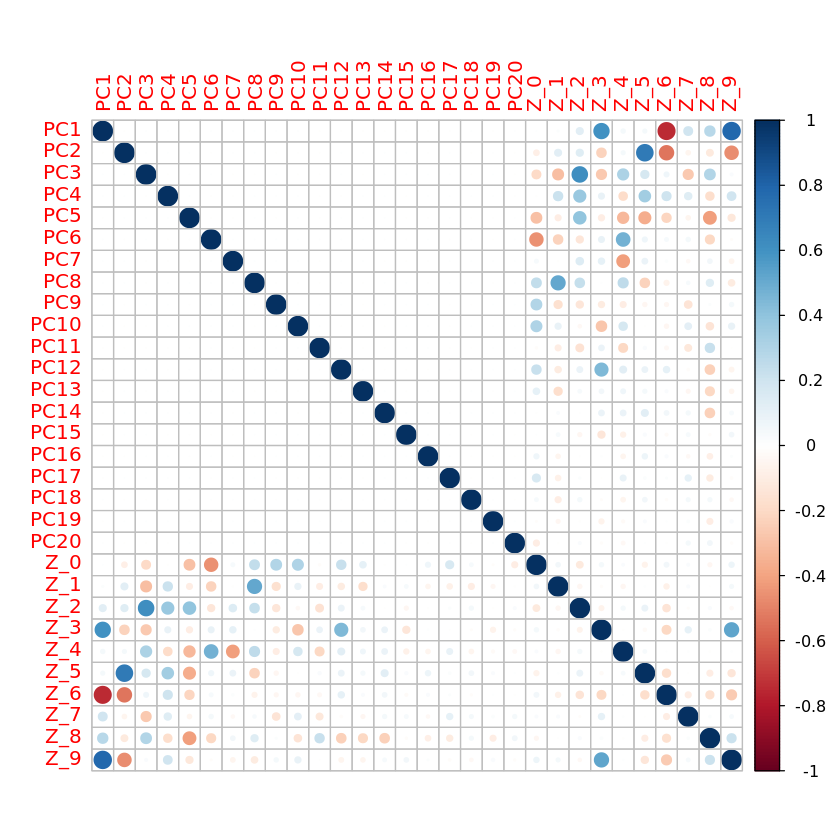

In [12]:
corrplot(cor(df2))

In [13]:
df3 = cbind(df_m, df_p, df_l)

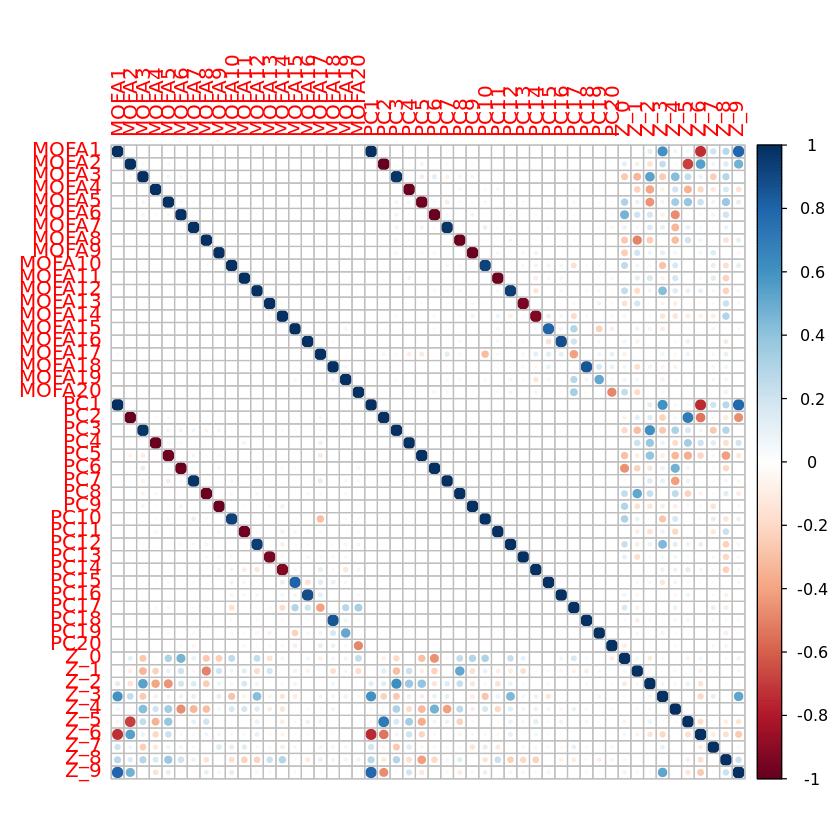

In [14]:
corrplot(cor(df3))

In [ ]:
######## ZINB-WaVE

In [18]:
df_z1 = read.csv(C4_file, row.names=1, sep="\t")
head(df_z1,2)
dim(df_z1)

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10
21843_1#10,0.4537363,0.03802262,0.8920017,-0.02595381,-0.3830555,0.6921631,0.00265409,0.10902981,-0.06309692,0.3611151
21843_1#100,-0.4772789,0.03313991,0.7756646,0.58491947,0.4641647,-0.2277299,-0.18550672,-0.04082547,-0.27767241,0.2808062


[1] 34256    10

In [19]:
df_z2 = read.csv(C5_file, row.names=1, sep="\t")
head(df_z2,2)
dim(df_z2)

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20
21843_1#10,0.4531802,-0.0694185,0.3934048,0.6943918,-0.4493740,-0.8422061,0.01821594,0.07699466,0.2257630,0.2546721,0.4991797,0.1188517,-0.1656661,-0.2225869,-0.2040603,0.09912687,0.2066619,0.7064157,0.1037178,-0.1674656
21843_1#100,-0.5335403,0.0878233,0.8501492,0.1520835,0.5062664,0.2475108,0.09694170,0.37738268,-0.2530823,-0.1103691,0.6006718,0.2341784,-0.2321861,-0.1002164,0.1204898,0.02622074,0.2877955,-0.3480662,-0.4054457,-0.1174588


[1] 34256    20

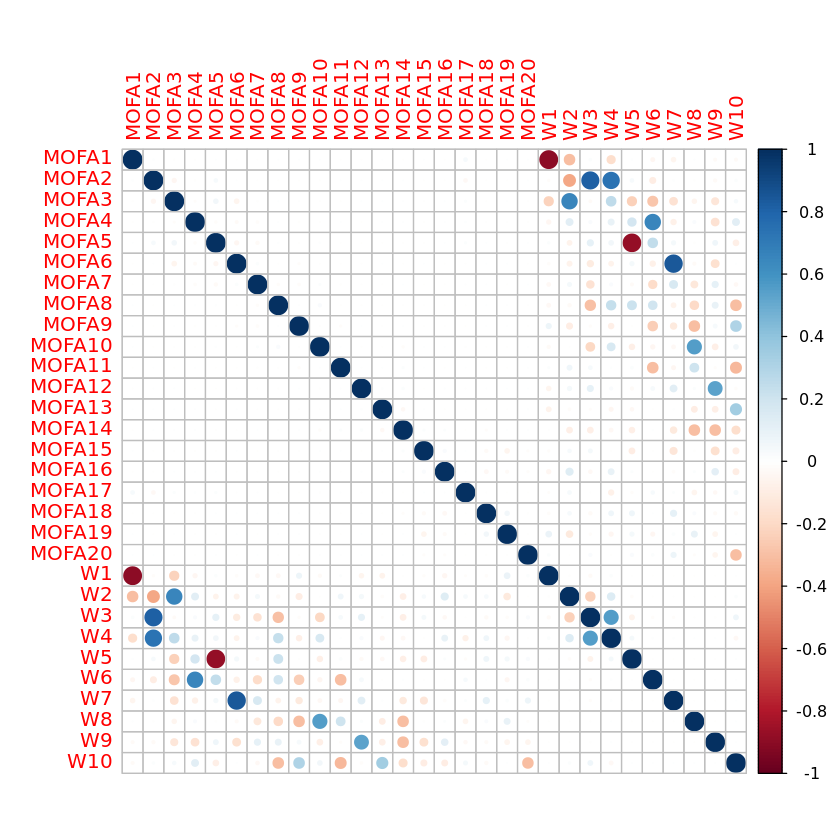

In [17]:
df4 = cbind(df_m, df_z1)
corrplot(cor(df4))

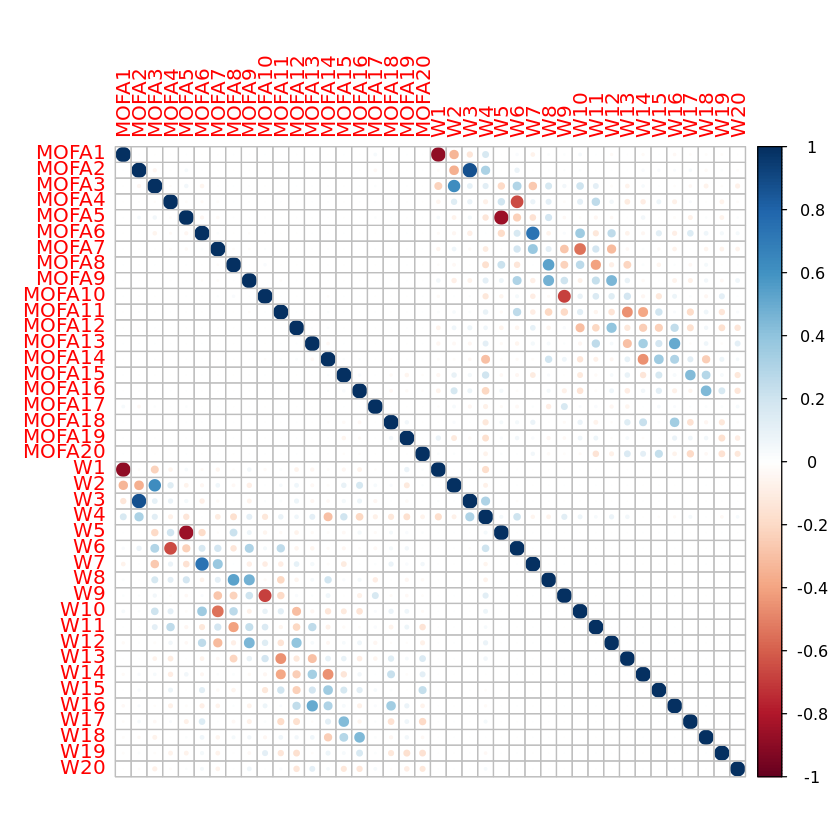

In [20]:
df5 = cbind(df_m, df_z2)
corrplot(cor(df5))

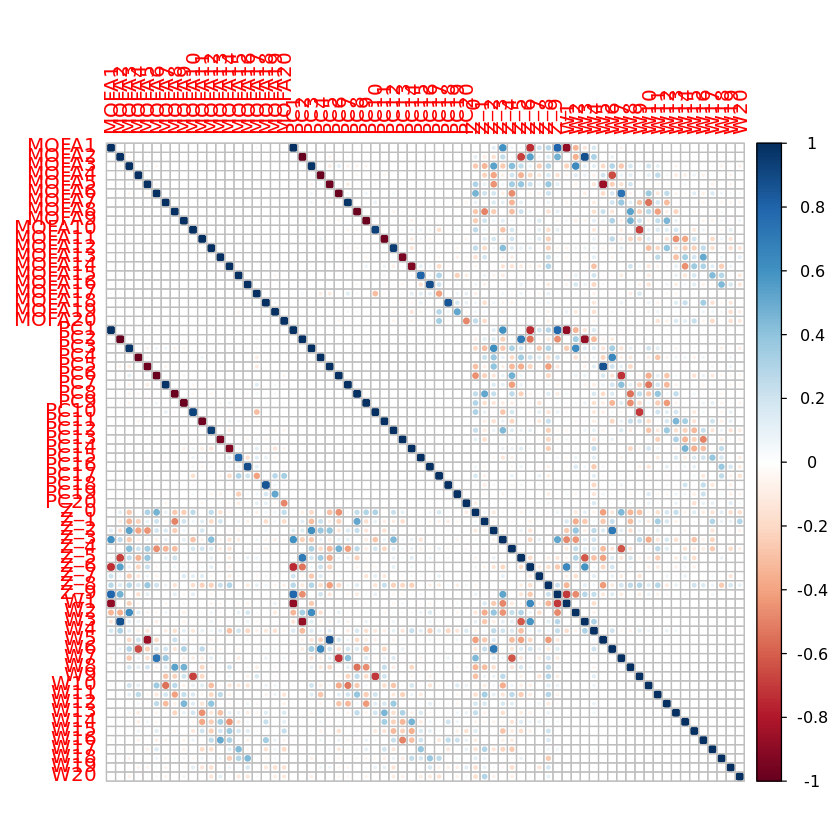

In [24]:
df6 = cbind(df_m, df_p, df_l, df_z2)
corrplot(cor(df6))